## Draw a 3D lines in an object

In [4]:
import cv2
import mediapipe as mp

# MediaPipe Objectron instantiation
mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

objectron = mp_objectron.Objectron(
    static_image_mode=False,
    max_num_objects=5,
    min_detection_confidence=0.5,
    model_name='Chair'
)

# Open the video file
video_path = 'video.mp4'
cap = cv2.VideoCapture(video_path)

# Loop through each frame in the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the BGR image to RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the image with Objectron
    results = objectron.process(image)

    # Draw 3D bounding boxes on the image
    annotated_image = image.copy()
    if results.detected_objects:
        for detected_object in results.detected_objects:
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=detected_object.landmarks_2d,
                connections=mp_objectron.BOX_CONNECTIONS,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)
            )

    # Convert the RGB image back to BGR for displaying with OpenCV
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

    # Display the annotated image
    cv2.imshow('Annotated Video', annotated_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video and destroy windows
cap.release()
cv2.destroyAllWindows()


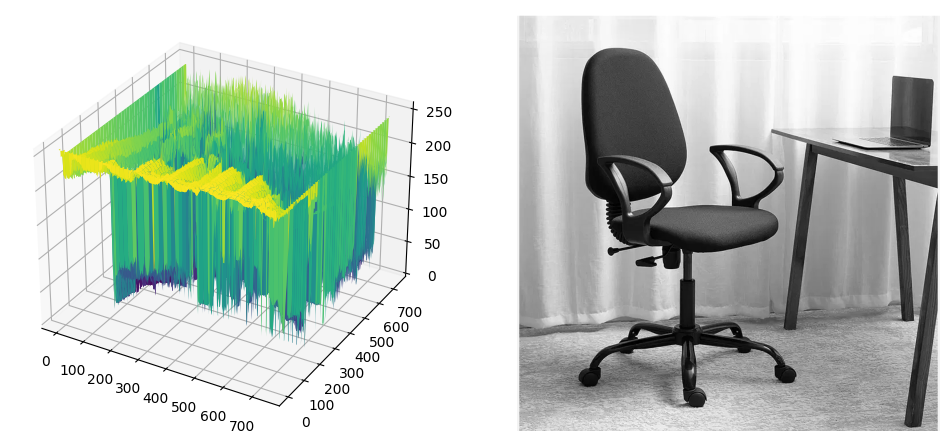

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from PIL import Image

# Read image
image_path = 'data/Screenshot 2023-08-08 at 8.14.19 PM.png'
image = Image.open(image_path).convert('L') # Convert to grayscale
image_data = np.array(image)

# Create a new figure
fig = plt.figure(figsize=(12, 6))

# Create a 3D subplot for the visualization
ax1 = fig.add_subplot(121, projection='3d')
x, y = np.meshgrid(range(image_data.shape[1]), range(image_data.shape[0]))
ax1.plot_surface(x, y, image_data, cmap='viridis')

# Create a 2D subplot for the original image without x and y axis
ax2 = fig.add_subplot(122)
ax2.imshow(image, cmap='gray')
ax2.axis('off') # Turn off the x and y axis

plt.show()


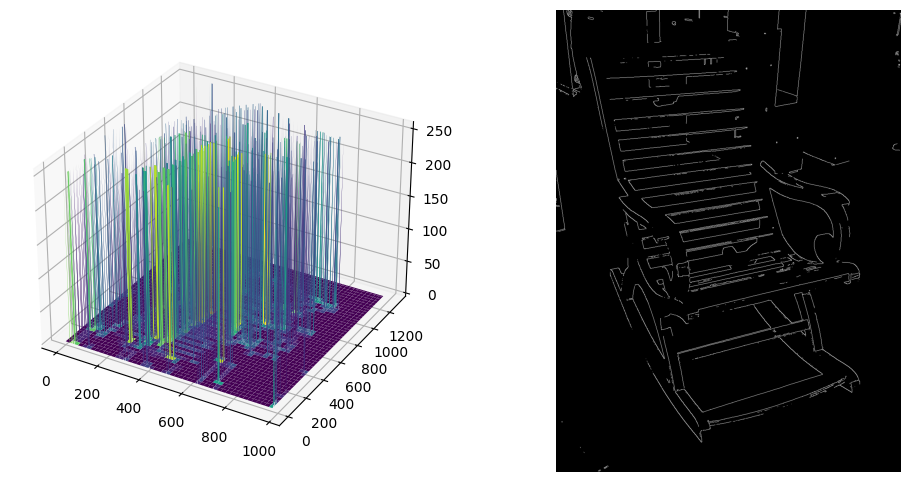

In [5]:
import cv2

# Read image
image_path = 'Screenshot 2023-08-11 at 8.00.22 PM.png'
image = Image.open(image_path).convert('L') # Convert to grayscale
image_data = np.array(image)

# Apply Canny edge detection
edges = cv2.Canny(image_data, 200, 200)

# Create a new figure
fig = plt.figure(figsize=(12, 6))

# Create a 3D subplot for the edge visualization
ax1 = fig.add_subplot(121, projection='3d')
x, y = np.meshgrid(range(edges.shape[1]), range(edges.shape[0]))
ax1.plot_surface(x, y, edges, cmap='viridis')

# Create a 2D subplot for the edges without x and y axis
ax2 = fig.add_subplot(122)
ax2.imshow(edges, cmap='gray')
ax2.axis('off') # Turn off the x and y axis

plt.show()


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cap = cv2.VideoCapture('video.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter objects for both the 3D and 2D visualizations
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out_3d = cv2.VideoWriter('3d_vis.mp4', fourcc, fps, (width, height))
out_2d = cv2.VideoWriter('2d_edges.mp4', fourcc, fps, (width, height), isColor=False)

while True:
    ret, frame = cap.read()

    # Check if the frame is not empty
    if not ret:
        print("Can't receive frame. Exiting ...")
        break

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_frame, 200, 200)

    # Create a new figure for 3D plot with a larger figsize
    fig = plt.figure(figsize=(12, 6)) # Increase the figsize as needed
    ax = fig.add_subplot(111, projection='3d')
    x, y = np.meshgrid(range(edges.shape[1]), range(edges.shape[0]))
    ax.plot_surface(x, y, edges, cmap='viridis')

    # Convert 3D plot to an image
    fig.canvas.draw()
    img_3d = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img_3d = img_3d.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # Resize the 3D image to match the original video size
    img_3d_resized = cv2.resize(img_3d, (width, height))

    # Write the 3D and 2D frames to the output videos
    out_3d.write(img_3d_resized)
    out_2d.write(edges)

    plt.close()

cap.release()
out_3d.release()
out_2d.release()

print("3D visualization video saved as 3d_vis.mp4.")
print("2D edge video saved as 2d_edges.mp4.")


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Can't receive frame. Exiting ...
3D visualization video saved as 3d_vis.mp4.
2D edge video saved as 2d_edges.mp4.


## Find out the Edges using Canny edge detection and Draw 3D visualization

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cap = cv2.VideoCapture('video.mp4')
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Create a new figure for 3D plot with a larger figsize to determine the output video size
fig = plt.figure(figsize=(12, 6))
canvas_width, canvas_height = fig.canvas.get_width_height()
plt.close()

# Define the codec and create VideoWriter objects for both the 3D and 2D visualizations
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' instead of 'MP4V'
out_3d = cv2.VideoWriter('3d_vis.mp4', fourcc, fps, (canvas_width, canvas_height))
out_2d = cv2.VideoWriter('2d_edges.mp4', fourcc, fps, (canvas_width, canvas_height), isColor=False)

while True:
    ret, frame = cap.read()

    # Check if the frame is not empty
    if not ret:
        print("Can't receive frame. Exiting ...")
        break

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_frame, 200, 200)

    # Create a new figure for 3D plot with the same figsize
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    x, y = np.meshgrid(range(edges.shape[1]), range(edges.shape[0]))
    ax.plot_surface(x, y, edges, cmap='viridis')
    plt.tight_layout() # Reduce whitespace

    # Convert 3D plot to an image
    fig.canvas.draw()
    img_3d = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img_3d = img_3d.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # Resize the 2D edges to match the canvas size
    edges_resized = cv2.resize(edges, (canvas_width, canvas_height))

    # Write the 3D and 2D frames to the output videos
    out_3d.write(img_3d)
    out_2d.write(edges_resized)

    plt.close()

cap.release()
out_3d.release()
out_2d.release()

print("3D visualization video saved as 3d_vis.mp4.")
print("2D edge video saved as 2d_edges.mp4.")


Can't receive frame. Exiting ...
3D visualization video saved as 3d_vis.mp4.
2D edge video saved as 2d_edges.mp4.


## Find out the Disparity map using StereoBM & MiDas

In [10]:
import cv2
import numpy as np

# Callback function for trackbars, does nothing
def nothing(x):
    pass

# Open video file
cap = cv2.VideoCapture('video.mp4')

cv2.namedWindow('Disparity Map')
cv2.createTrackbar('Num Disparities', 'Disparity Map', 1, 10, nothing) # Max value * 16
cv2.createTrackbar('Block Size', 'Disparity Map', 5, 50, nothing) # Must be odd

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame. Exiting ...")
        break

    # Splitting left and right images
    height, width = frame.shape[:2]
    left_image = cv2.cvtColor(frame[:, :width//2], cv2.COLOR_BGR2GRAY)
    right_image = cv2.cvtColor(frame[:, width//2:], cv2.COLOR_BGR2GRAY)

    # Get the trackbar values
    num_disp = cv2.getTrackbarPos('Num Disparities', 'Disparity Map') * 16
    block_size = cv2.getTrackbarPos('Block Size', 'Disparity Map')
    block_size = block_size + 1 if block_size % 2 == 0 else block_size

    # Create StereoBM object with the current settings
    stereo = cv2.StereoBM_create(numDisparities=num_disp, blockSize=block_size)

    # Compute the disparity map
    disparity = stereo.compute(left_image, right_image)

    # Normalize the disparity map for visualization
    disparity_visual = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Show the disparity map
    cv2.imshow('Disparity Map', disparity_visual)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Can't receive frame. Exiting ...


In [3]:
import cv2

# Open the video file
cap = cv2.VideoCapture('/Users/ahsan/Downloads/Stereo-Vision-DP/Maximum Likelihood Stereo Algorithm/teddy_original.png')

# Read a frame from the video
ret, frame = cap.read()

if ret:
    # Splitting left and right images (assuming they are side by side in the video)
    height, width = frame.shape[:2]
    left_image = frame[:, :width//2]
    right_image = frame[:, width//2:]

    # Save the left and right images
    cv2.imwrite('left_image1.jpg', left_image)
    cv2.imwrite('right_image1.jpg', right_image)

cap.release()


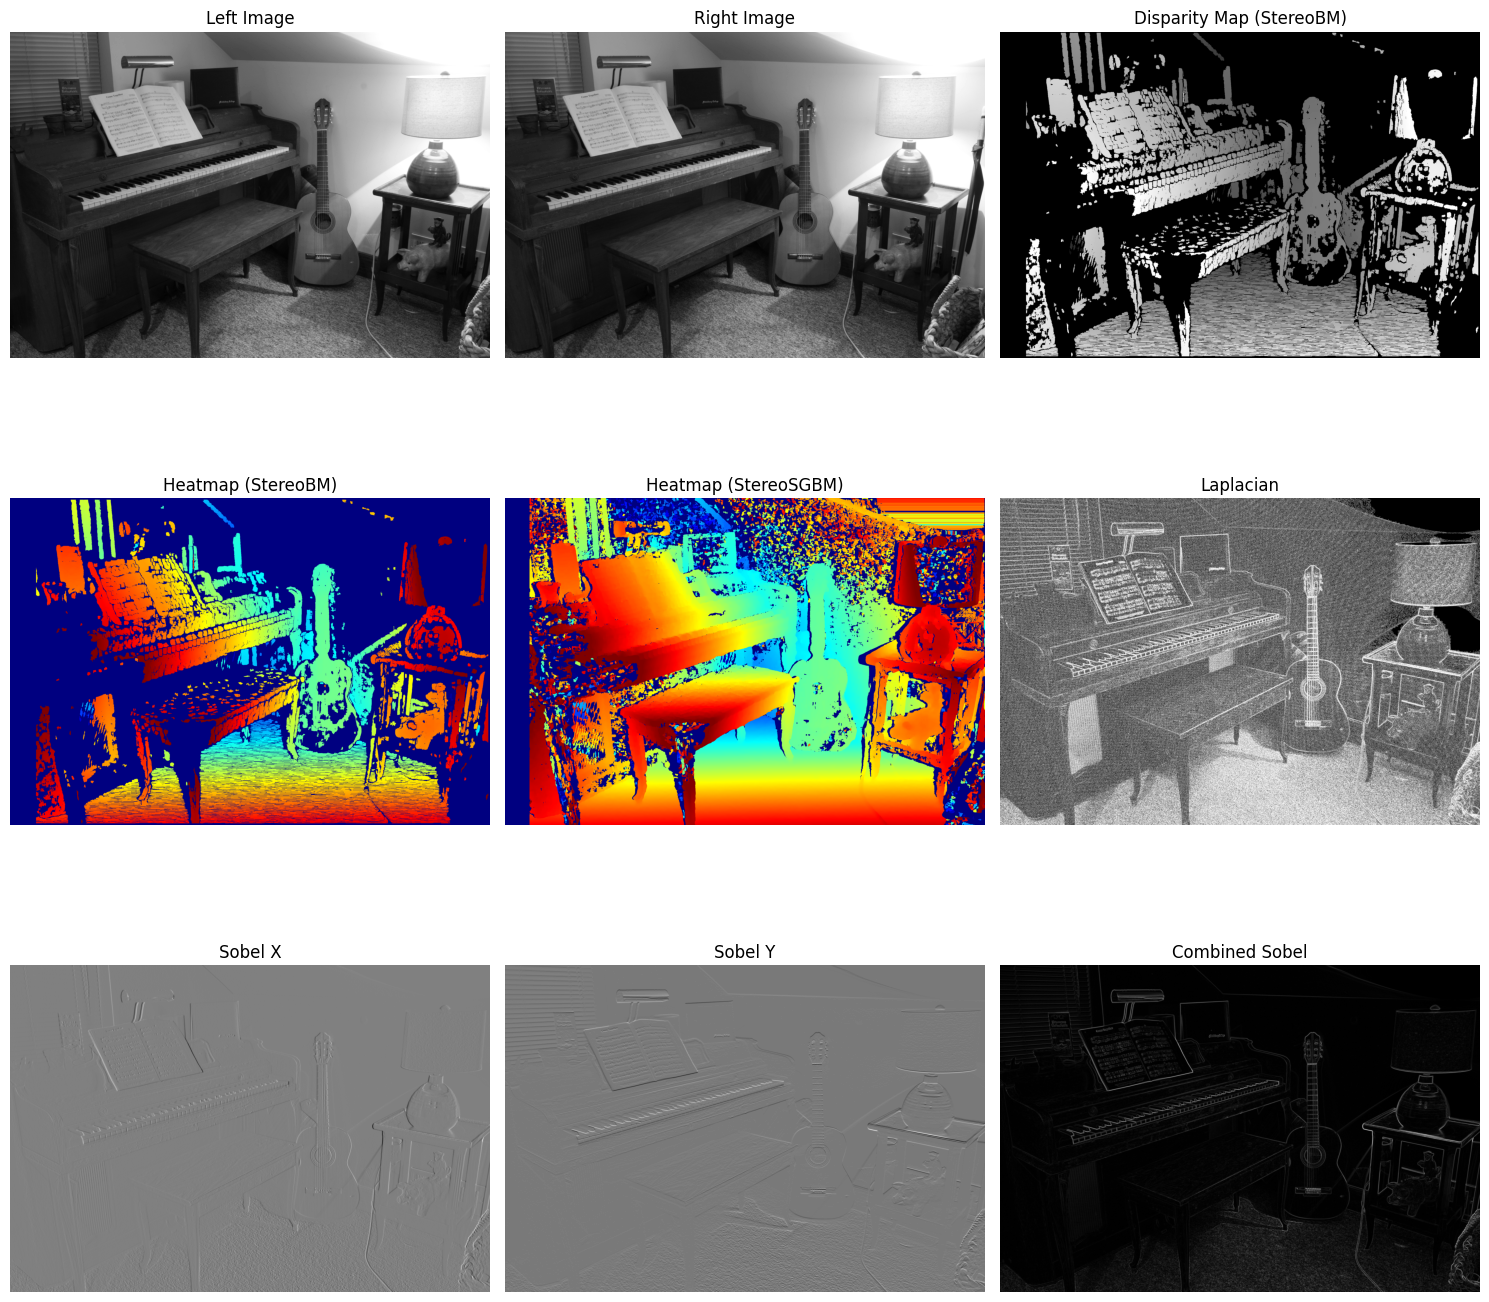

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the images
stereo_l = cv2.imread("im0.png", cv2.IMREAD_GRAYSCALE)
stereo_r = cv2.imread("im1.png", cv2.IMREAD_GRAYSCALE)

# Resize if necessary
if stereo_l.shape != stereo_r.shape:
    stereo_r = cv2.resize(stereo_r, (stereo_l.shape[1], stereo_l.shape[0]))

# Create StereoBM and StereoSGBM objects
stereo_bm = cv2.StereoBM_create()
stereo_bm.setNumDisparities(128)
stereo_bm.setBlockSize(21)
stereo_bm.setSpeckleRange(1)
stereo_bm.setSpeckleWindowSize(100)
stereo_bm.setMinDisparity(16)

stereo_sgbm = cv2.StereoSGBM_create(minDisparity=16,
                                   numDisparities=128,
                                   blockSize=23,
                                   speckleWindowSize=100,
                                   speckleRange=1)

# Compute disparity maps
disparity_bm = stereo_bm.compute(stereo_l, stereo_r).astype(np.float32) / 4.0
disparity_sgbm = stereo_sgbm.compute(stereo_l, stereo_r).astype(np.float32) / 16.0

# Normalize and apply color maps
disparity_bm = cv2.normalize(disparity_bm, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_bm_heatmap = cv2.applyColorMap(disparity_bm, cv2.COLORMAP_JET)

disparity_sgbm = cv2.normalize(disparity_sgbm, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_sgbm_heatmap = cv2.applyColorMap(disparity_sgbm, cv2.COLORMAP_JET)

# Compute Laplacian
laplacian = cv2.Laplacian(stereo_l, cv2.CV_64F)

# Convert to absolute values
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Normalize the Laplacian
minVal, maxVal, _, _ = cv2.minMaxLoc(laplacian_abs)
laplacian_normalized = (laplacian_abs - minVal) / (maxVal - minVal) * 255
laplacian_display = laplacian_normalized.astype(np.uint8)

# Apply histogram equalization to enhance edges
laplacian_equalized = cv2.equalizeHist(laplacian_display)


# Compute Sobel filters
sobel_x = cv2.Sobel(stereo_l, cv2.CV_64F, 1, 0, ksize=7)
sobel_y = cv2.Sobel(stereo_l, cv2.CV_64F, 0, 1, ksize=7)
sobel_combined = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs[0, 0].imshow(stereo_l, 'gray')
axs[0, 0].set_title("Left Image")
axs[0, 0].axis('off')

axs[0, 1].imshow(stereo_r, 'gray')
axs[0, 1].set_title("Right Image")
axs[0, 1].axis('off')

axs[0, 2].imshow(disparity_bm, 'gray')
axs[0, 2].set_title("Disparity Map (StereoBM)")
axs[0, 2].axis('off')

axs[1, 0].imshow(cv2.cvtColor(disparity_bm_heatmap, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Heatmap (StereoBM)")
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(disparity_sgbm_heatmap, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Heatmap (StereoSGBM)")
axs[1, 1].axis('off')

axs[1, 2].imshow(laplacian_equalized, 'gray')
axs[1, 2].set_title("Laplacian")
axs[1, 2].axis('off')

axs[2, 0].imshow(sobel_x, 'gray')
axs[2, 0].set_title("Sobel X")
axs[2, 0].axis('off')

axs[2, 1].imshow(sobel_y, 'gray')
axs[2, 1].set_title("Sobel Y")
axs[2, 1].axis('off')

axs[2, 2].imshow(sobel_combined, 'gray')
axs[2, 2].set_title("Combined Sobel")
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()


In [1]:
from transformers import DPTImageProcessor, DPTForDepthEstimation
import torch
import numpy as np
from PIL import Image

import torch
print(torch.__version__)


url = "im0.png"
image = Image.open(url).convert('RGB') # Make sure the image is in RGB mode

processor = DPTImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

size = (640, 480) # You can adjust this size according to your needs
resized_image = image.resize(size)

# prepare image for the model
inputs = processor(images=[resized_image], return_tensors="pt")  # Wrap the image in a list

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)


/Users/ahsan/Downloads/3D/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.0.1


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


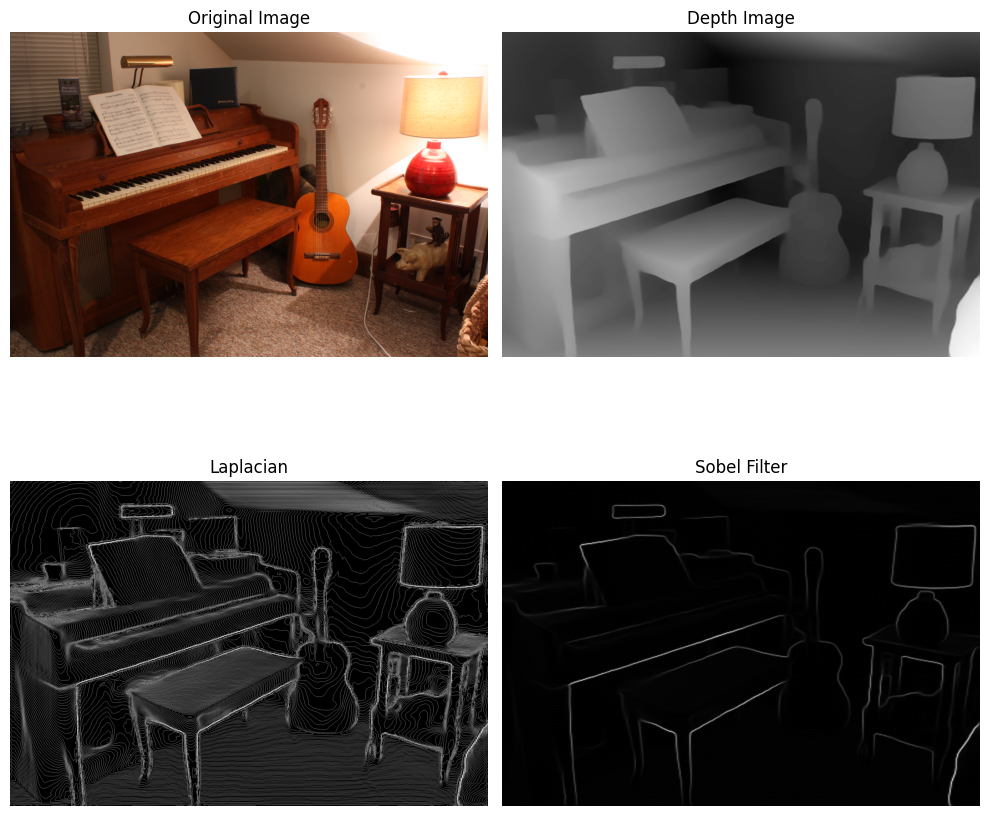

In [4]:
depth_array = np.array(depth) # Convert the PIL Image to a NumPy array
laplacian = cv2.Laplacian(depth_array, cv2.CV_64F)

# Firstly apply the sobel filter to our original image

# horizontal
sobelx_original = cv2.Sobel(depth_array, cv2.CV_64F, 1, 0, ksize=5)

# vertical
sobely_original = cv2.Sobel(depth_array, cv2.CV_64F, 0, 1, ksize=5)

sobelxy_original = np.sqrt(np.square(sobelx_original) + np.square(sobely_original))

# Normalize the result to 0-255
sobelxy_original = cv2.normalize(sobelxy_original, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Show the original image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].axis('off')
axs[0, 0].set_title("Original Image")

# Show the depth image
axs[0, 1].imshow(depth, cmap='gray')
axs[0, 1].axis('off')
axs[0, 1].set_title("Depth Image")

# Show the Laplacian image
laplacian = cv2.Laplacian(depth_array, cv2.CV_64F)
axs[1, 0].imshow(laplacian.astype(np.uint8), 'gray')
axs[1, 0].axis('off')
axs[1, 0].set_title("Laplacian")

# Show the Sobel combined image
sobelx_original = cv2.Sobel(depth_array, cv2.CV_64F, 1, 0, ksize=5)
sobely_original = cv2.Sobel(depth_array, cv2.CV_64F, 0, 1, ksize=5)
sobelxy_original = np.sqrt(np.square(sobelx_original) + np.square(sobely_original))
sobelxy_original = cv2.normalize(sobelxy_original, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
axs[1, 1].imshow(sobelxy_original, 'gray')
axs[1, 1].axis('off')
axs[1, 1].set_title("Sobel Filter")

plt.tight_layout()
plt.show()
